<h1 style='text-align: center'>Breast Cancer Classification</h1>

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df = pd.read_csv('valuation.csv')
df

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Data Preprocessing

In [195]:
# dropping the column called No
df = df.drop(columns=['No'])
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [196]:
# converting the date column to datetime
df['Transaction date'] = df['Transaction date'].apply(lambda x: pd.to_datetime(f"{int(x):.0f}", format='%Y') + pd.Timedelta(days=(x % 1) * 365.25))

# Extract date component
df['Transaction date'] = df['Transaction date'].dt.date
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08-31,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


In [197]:
# checking the dimensions of the dataset
columns = df.shape[1]
rows = df.shape[0]

print(f"Number of features in the dataset: {columns}")
print(f"Number of data points in the dataset: {rows}")

Number of features in the dataset: 7
Number of data points in the dataset: 414


In [198]:
# checking the datatypes of the columns 
df.dtypes

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

In [199]:
df["Transaction date"] = pd.to_datetime(df["Transaction date"])

In [200]:
df.dtypes

Transaction date                       datetime64[ns]
House age                                     float64
Distance to the nearest MRT station           float64
Number of convenience stores                    int64
Latitude                                      float64
Longitude                                     float64
House price of unit area                      float64
dtype: object

In [201]:
# checking for any potential null values
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [202]:
# checking the statistical measures of the dataset
df.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013-02-23 15:25:13.043478272,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
min,2012-08-31 00:00:00,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012-11-30 00:00:00,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013-03-02 00:00:00,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013-06-02 00:00:00,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013-08-01 00:00:00,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000
std,NaN,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488


## Data Visualization

In [203]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08-31,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


### Line plots

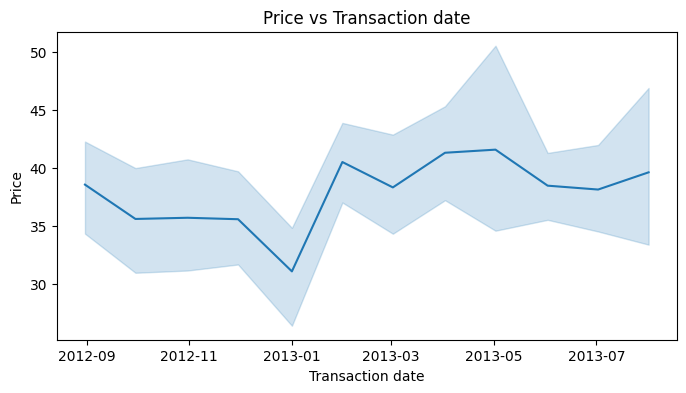

In [204]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Transaction date', y='House price of unit area', data=df)
plt.title('Price vs Transaction date')
plt.xlabel('Transaction date')
plt.ylabel('Price')
plt.show()

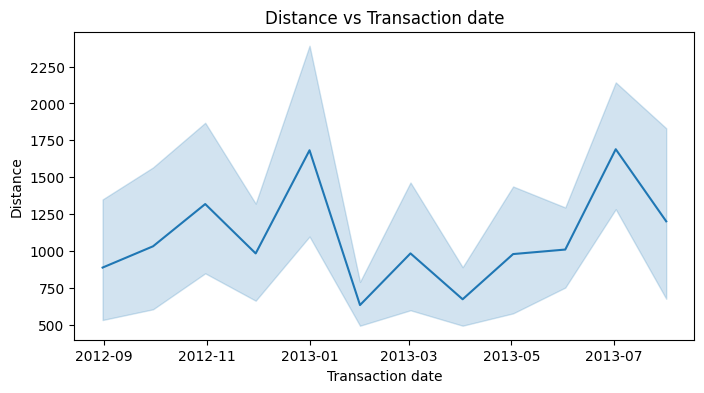

In [205]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Transaction date', y='Distance to the nearest MRT station', data=df)
plt.title('Distance vs Transaction date')
plt.xlabel('Transaction date')
plt.ylabel('Distance')
plt.show()

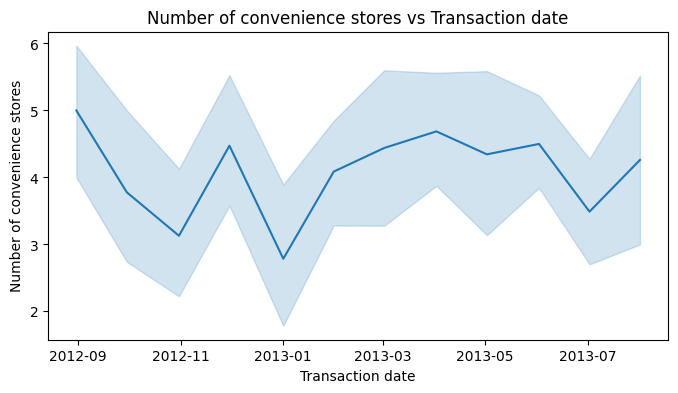

In [206]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Transaction date', y='Number of convenience stores', data=df)
plt.title('Number of convenience stores vs Transaction date')
plt.xlabel('Transaction date')
plt.ylabel('Number of convenience stores')
plt.show()

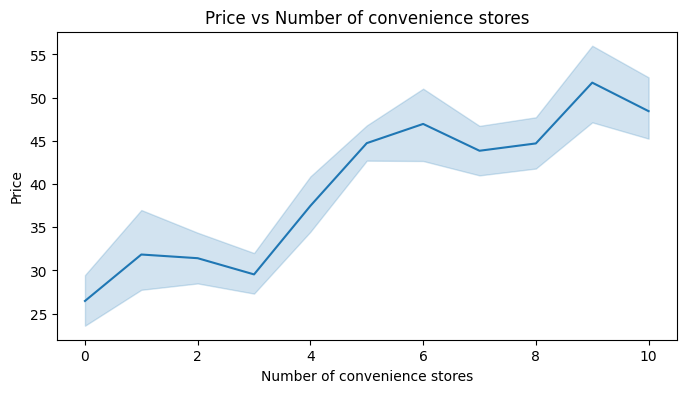

In [207]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Number of convenience stores', y='House price of unit area', data=df)
plt.title('Price vs Number of convenience stores')
plt.xlabel('Number of convenience stores')
plt.ylabel('Price')
plt.show()

There is a general trend where if the number of convenience stores increase, the price of the house per unit area tends to increase.

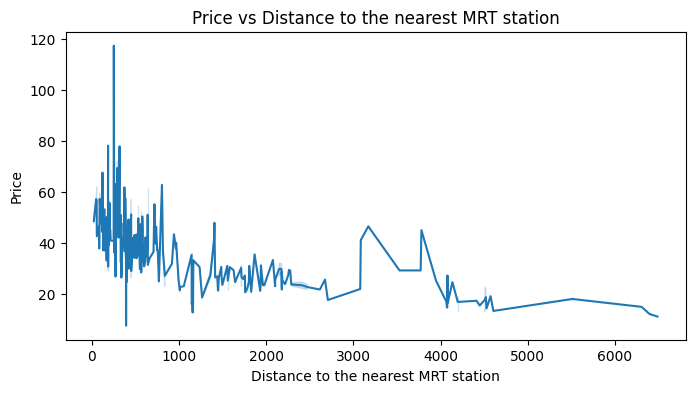

In [208]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Distance to the nearest MRT station', y='House price of unit area', data=df)
plt.title('Price vs Distance to the nearest MRT station')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('Price')
plt.show()

There is a clear relationship shown where if the distance to the nearest MRT station increases, the price of the house decreases.

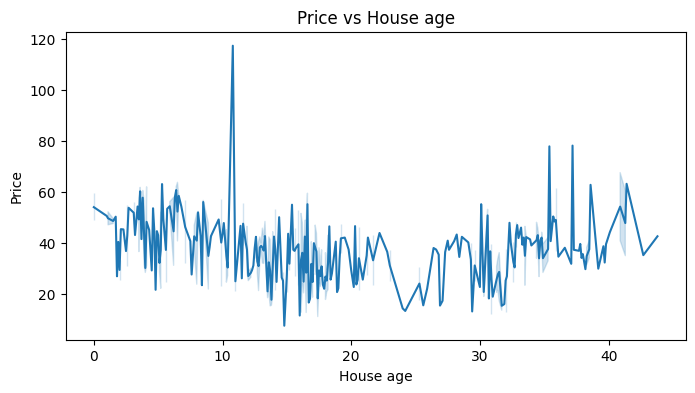

In [209]:
plt.figure(figsize=(8,4))
sns.lineplot(x='House age', y='House price of unit area', data=df)
plt.title('Price vs House age')
plt.xlabel('House age')
plt.ylabel('Price')
plt.show()

This graph shows a mixed relationship with houses just over 10 years having the highest price.

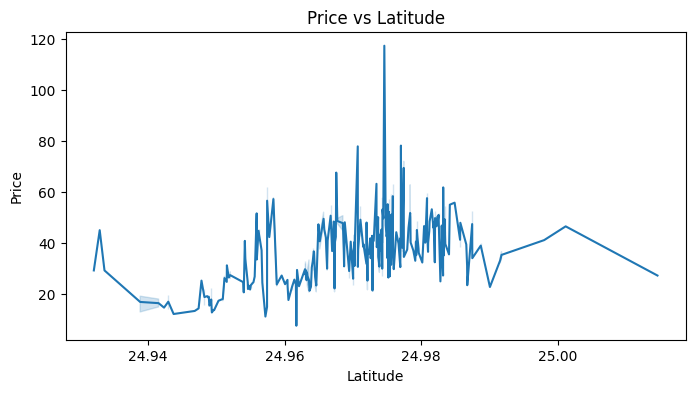

In [210]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Latitude', y='House price of unit area', data=df)
plt.title('Price vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

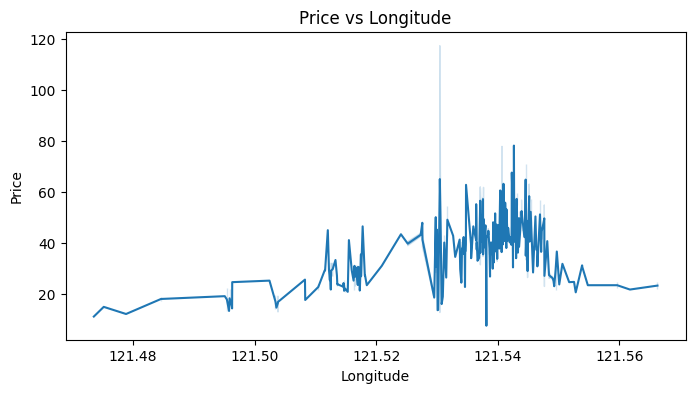

In [211]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Longitude', y='House price of unit area', data=df)
plt.title('Price vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.show()

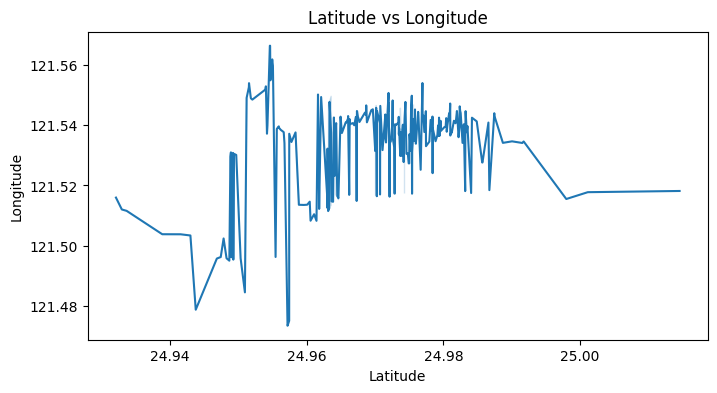

In [212]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Latitude', y='Longitude',data=df)
plt.title('Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Box plots

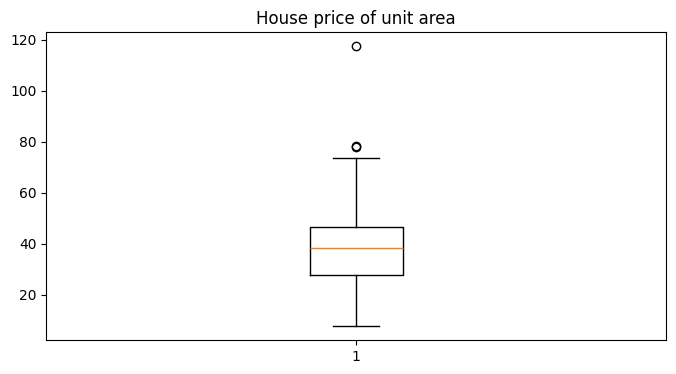

In [213]:
plt.figure(figsize=(8,4))
plt.boxplot(df['House price of unit area'])
plt.title('House price of unit area')
plt.show()

Just two entries are shown to be outliers. This could be realistic in terms of real estate industry.

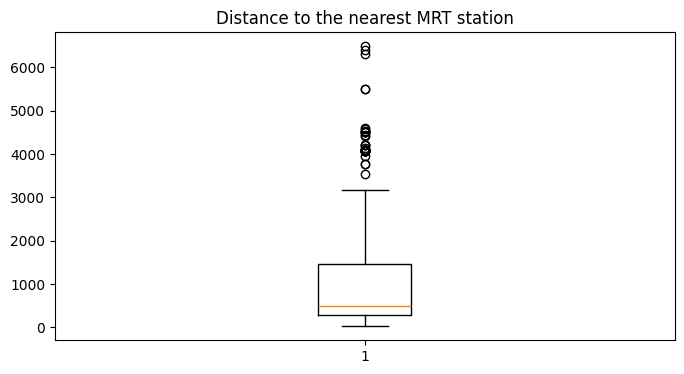

In [214]:
plt.figure(figsize=(8,4))
plt.boxplot(df['Distance to the nearest MRT station'])
plt.title('Distance to the nearest MRT station')
plt.show()

There seem to be some outliers for this feature as well. This could be ignored as it is geographically possible.

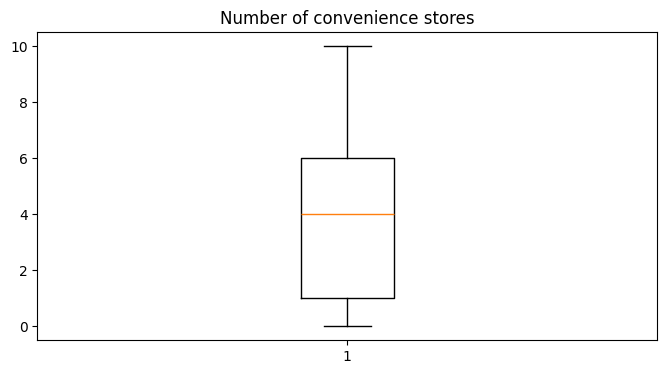

In [215]:
plt.figure(figsize=(8,4))
plt.boxplot(df['Number of convenience stores'])
plt.title('Number of convenience stores')
plt.show()

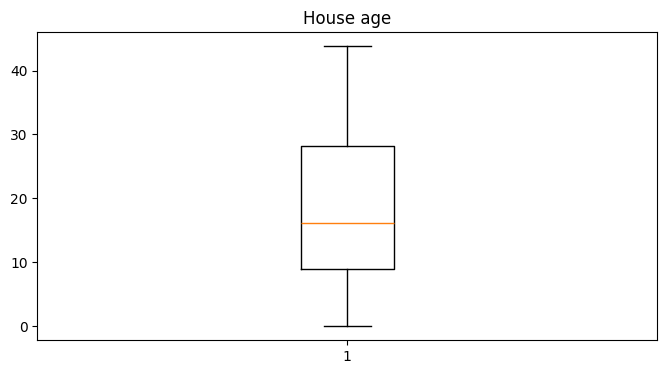

In [216]:
plt.figure(figsize=(8,4))
plt.boxplot(df['House age'])
plt.title('House age')
plt.show()

### Violin Plots

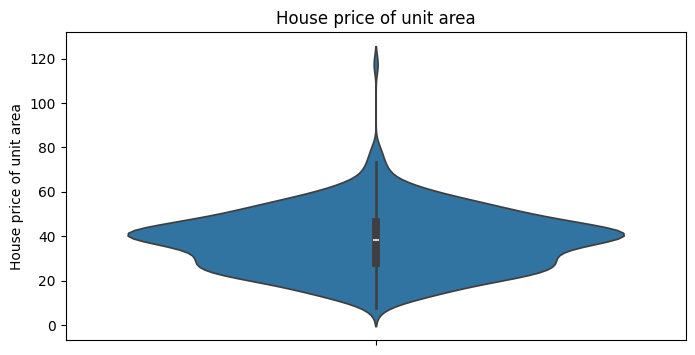

In [217]:
plt.figure(figsize=(8,4))
sns.violinplot(df['House price of unit area'])
plt.title('House price of unit area')
plt.show()

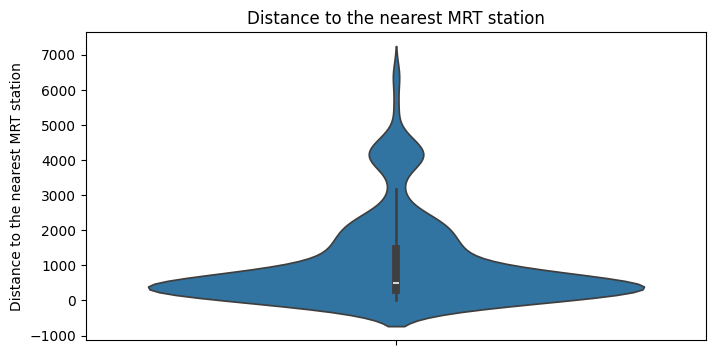

In [218]:
plt.figure(figsize=(8,4))
sns.violinplot(df['Distance to the nearest MRT station'])
plt.title('Distance to the nearest MRT station')
plt.show()

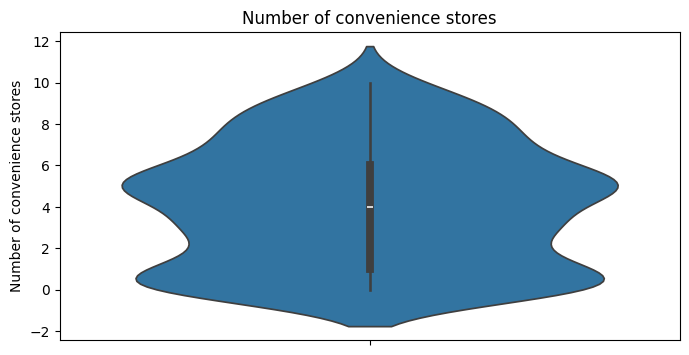

In [219]:
plt.figure(figsize=(8,4))
sns.violinplot(df['Number of convenience stores'])
plt.title('Number of convenience stores')
plt.show()

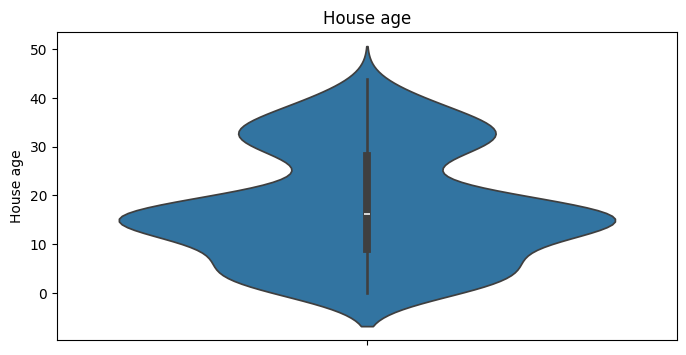

In [220]:
plt.figure(figsize=(8,4))
sns.violinplot(df['House age'])
plt.title('House age')
plt.show()

### Histograms

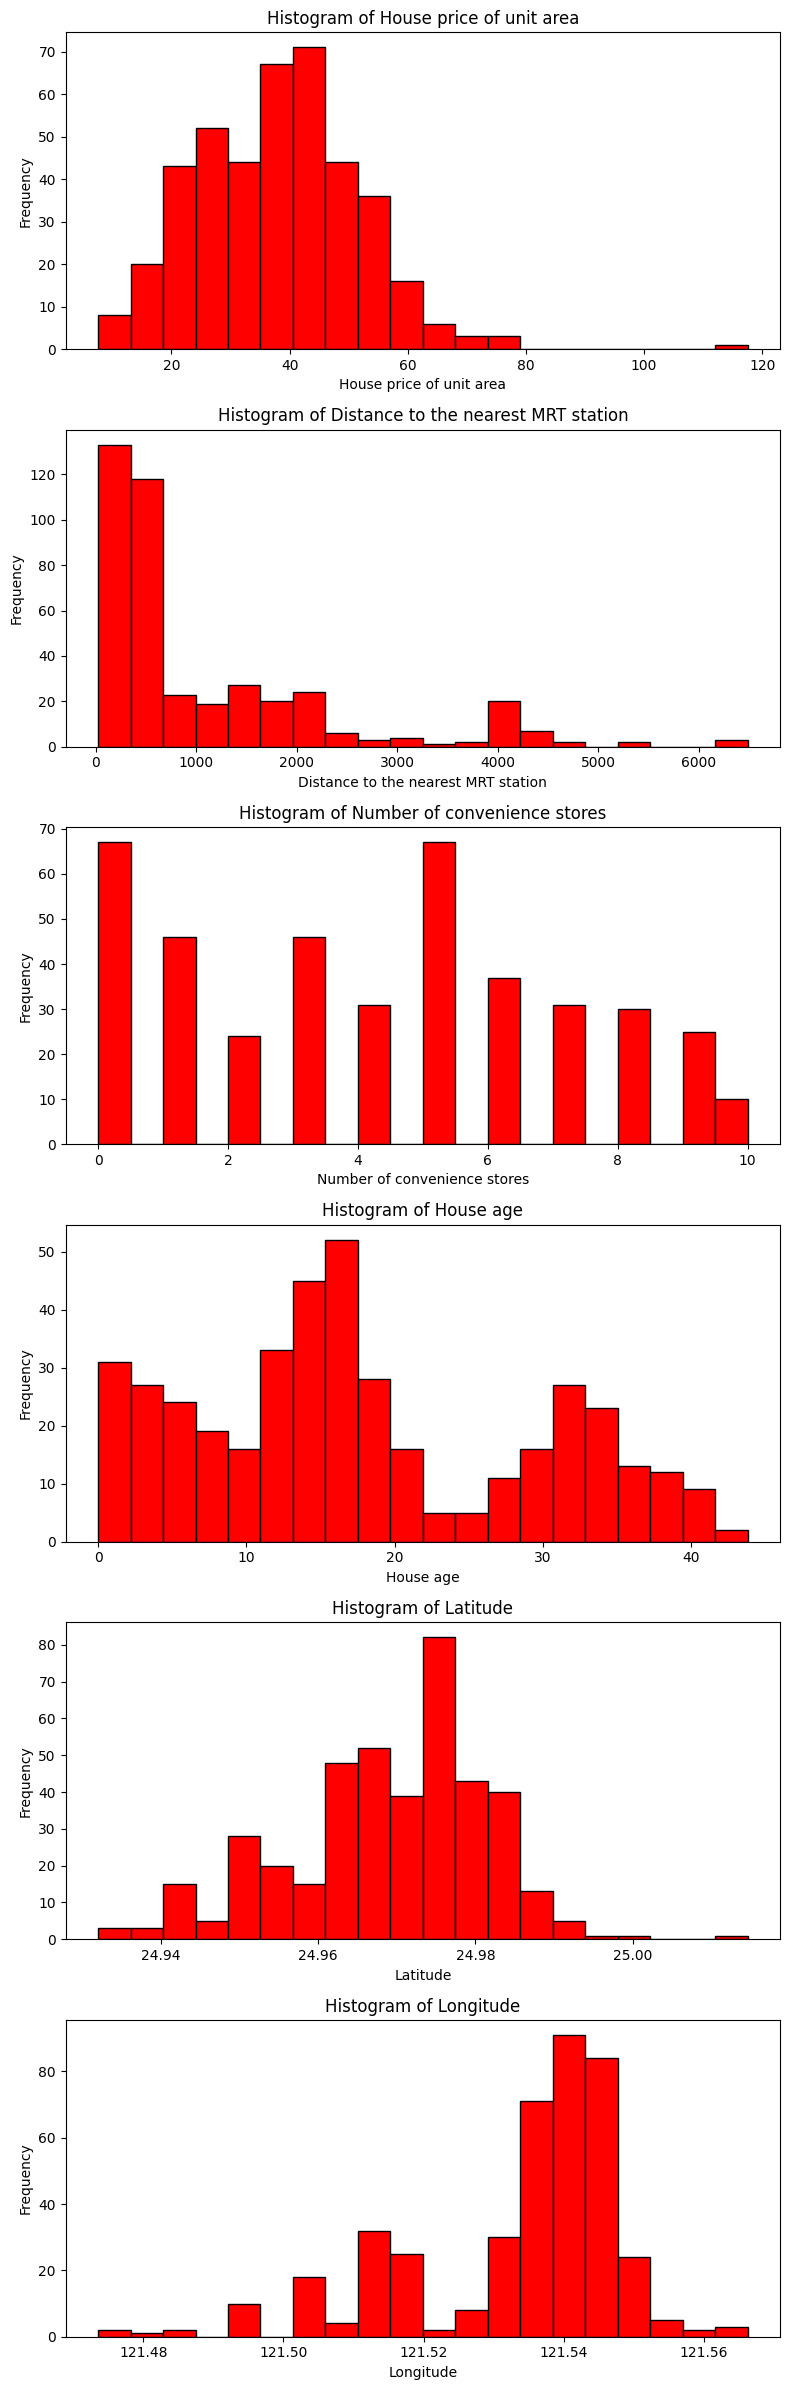

In [229]:
columns_to_plot = ['House price of unit area', 'Distance to the nearest MRT station', 
                   'Number of convenience stores', 'House age', 'Latitude', 'Longitude']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 4*len(columns_to_plot)))

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    axs[i].hist(df[column], bins=20, color='red', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Engineering

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

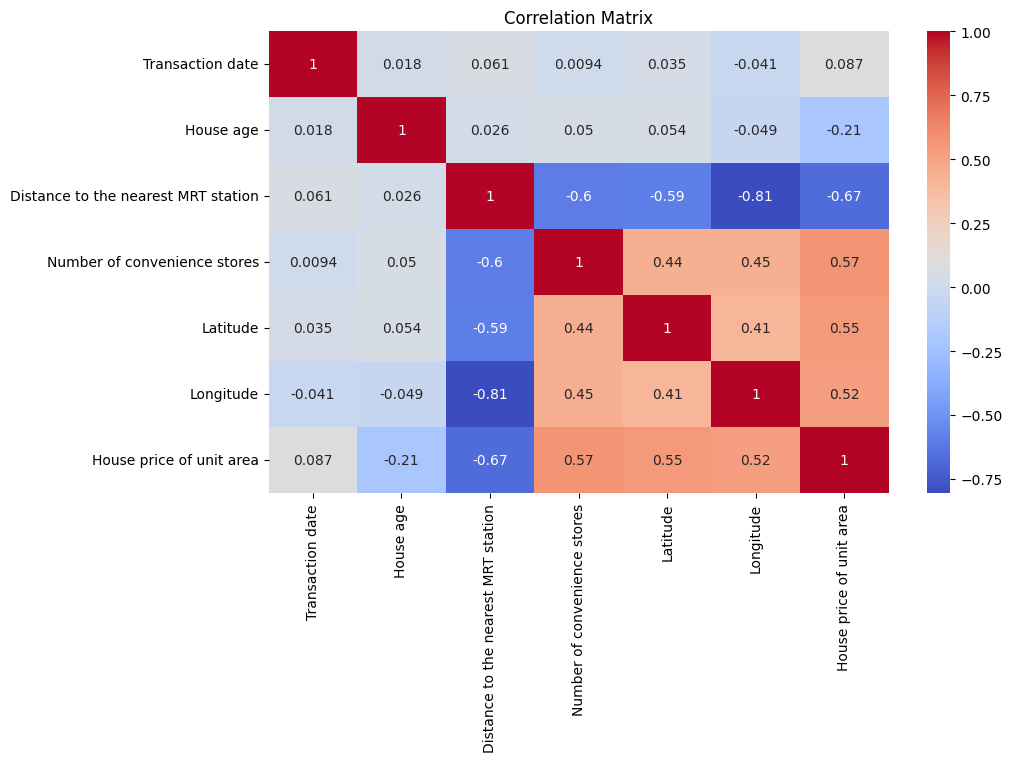

In [227]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

### Pair Plot

<Figure size 800x400 with 0 Axes>

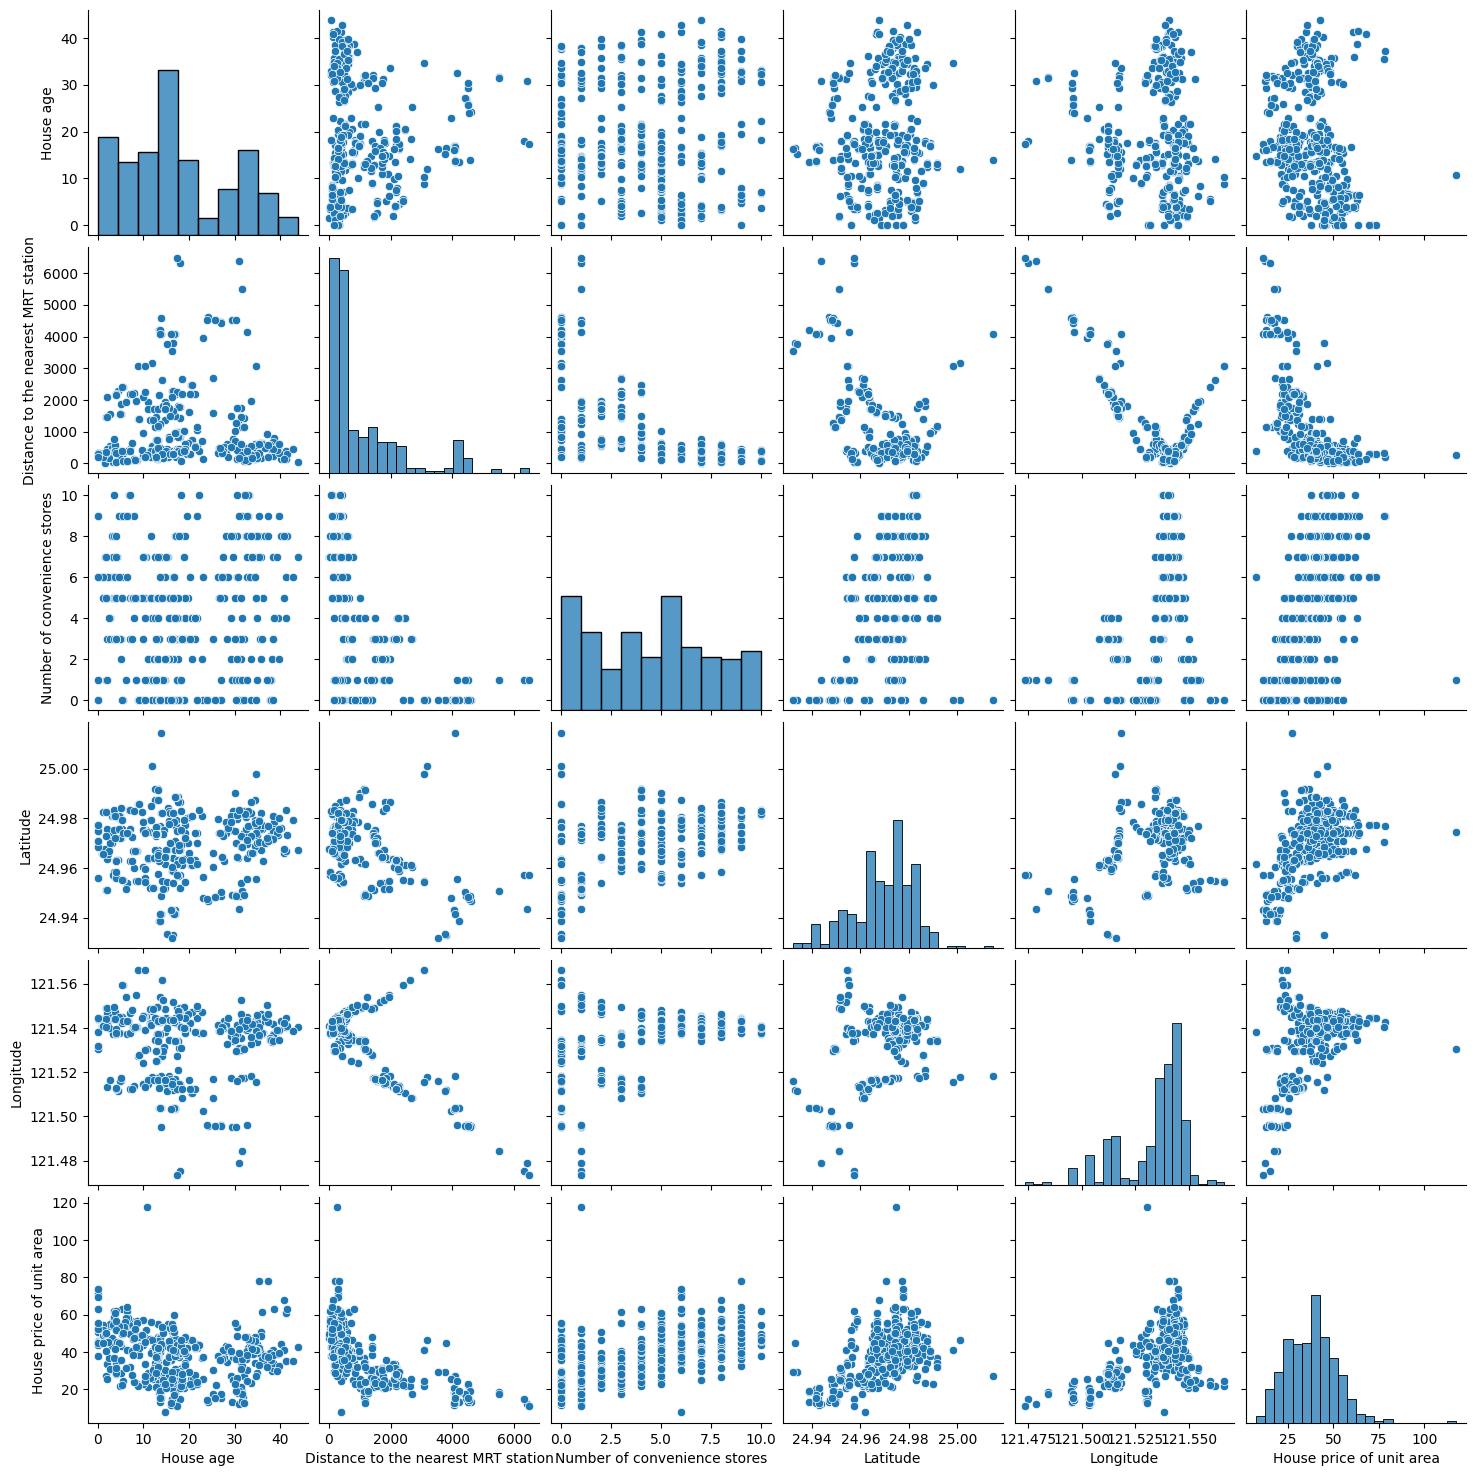

In [238]:
plt.figure(figsize=(8,4))
sns.pairplot(df)
plt.show()

### Scatter Plots

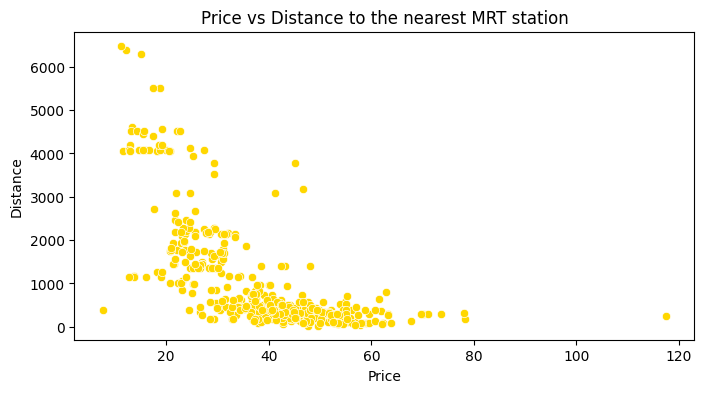

In [240]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Distance to the nearest MRT station', data=df, color='gold')
plt.title('Price vs Distance to the nearest MRT station')
plt.xlabel('Price')
plt.ylabel('Distance')
plt.show()

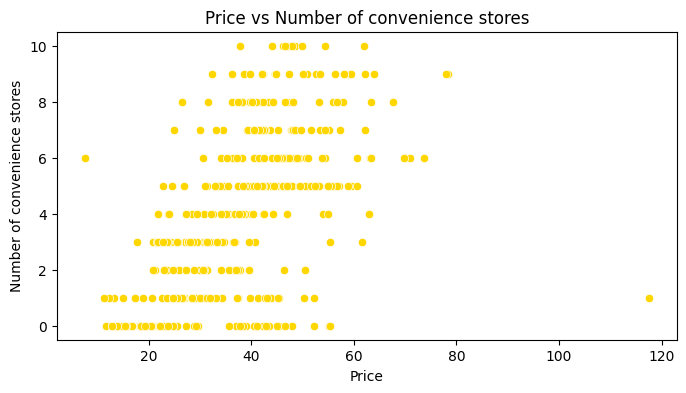

In [241]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Number of convenience stores', data=df, color='gold')
plt.title('Price vs Number of convenience stores')
plt.xlabel('Price')
plt.ylabel('Number of convenience stores')
plt.show()

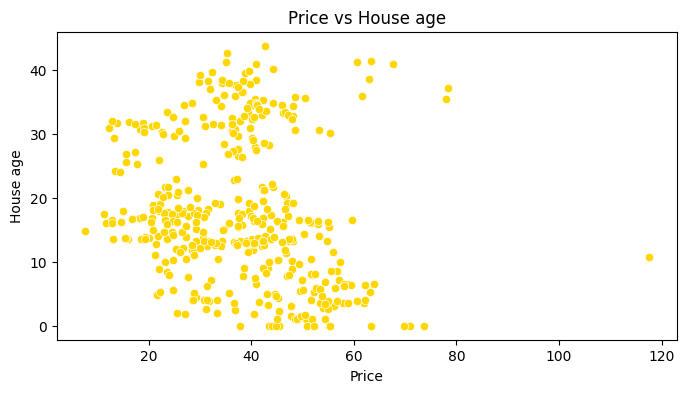

In [242]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='House age', data=df, color='gold')
plt.title('Price vs House age')
plt.xlabel('Price')
plt.ylabel('House age')
plt.show()

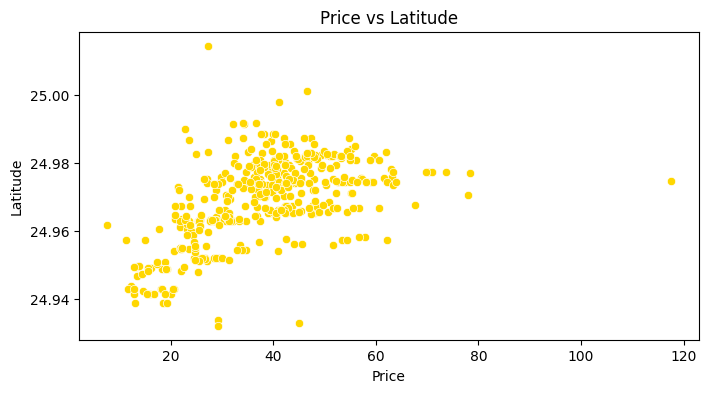

In [243]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Latitude', data=df, color='gold')
plt.title('Price vs Latitude')
plt.xlabel('Price')
plt.ylabel('Latitude')
plt.show()

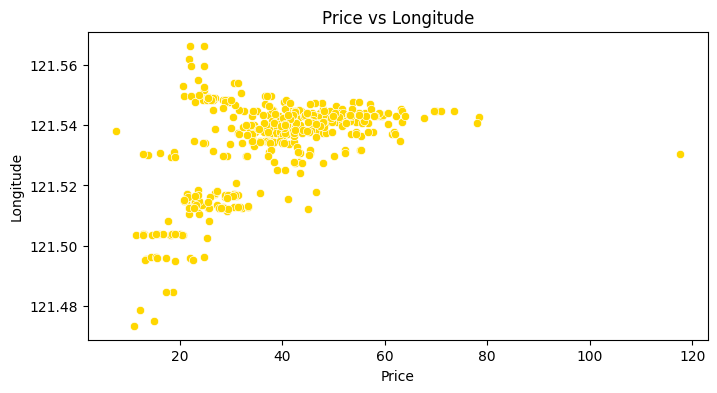

In [244]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='House price of unit area', y='Longitude', data=df, color='gold')
plt.title('Price vs Longitude')
plt.xlabel('Price')
plt.ylabel('Longitude')
plt.show()

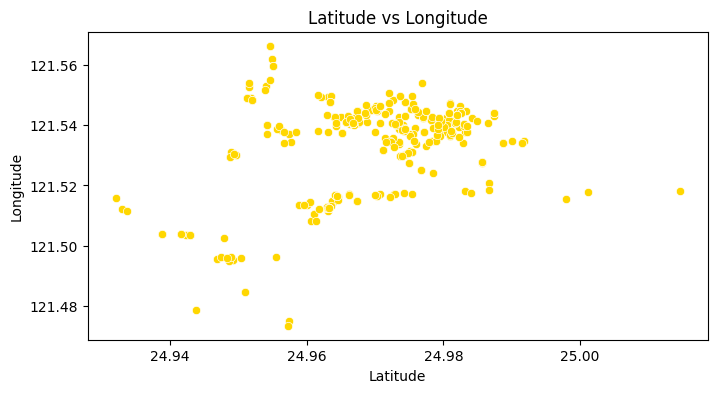

In [245]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Latitude', y='Longitude', data=df, color='gold')
plt.title('Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## Model Synthesis

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
x = df.drop(columns=['House price of unit area'], axis=1)
y = df['House price of unit area']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

### Building Models

In [ ]:
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train)
x_test = s_scaler.transform(x_test)

In [ ]:
x_train

In [ ]:
x_test

#### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
training_accuracy = lr.score(x_train, y_train)
testing_accuracy = lr.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

In [ ]:
sns.heatmap(pd.DataFrame(y_predict).corrwith(pd.DataFrame(y_test)), annot=True, cmap='coolwarm')

#### Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

In [ ]:
training_accuracy = dtr.score(x_train, y_train)
testing_accuracy = dtr.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

In [ ]:
y_predict = dtr.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")

In [ ]:
sns.heatmap(pd.DataFrame(y_predict).corrwith(pd.DataFrame(y_test)), annot=True, cmap='coolwarm')

#### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

In [ ]:
training_accuracy = rf.score(x_train, y_train)
testing_accuracy = rf.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

In [ ]:
y_predict = rf.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
msle = mean_squared_log_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")